In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#import the libraries 
#importing numpy for creating some arrays 
#importing pandas for making some dataframe 
#importing matplotlib.pyplot is for making plots and graphs 
#importing seaborn for making some plots 

In [2]:
df=pd.read_csv("gold_price_data.csv") 

#df is variable where is store the pandas dataframe and the pd.read_csv function is use to read the csv file

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


#df.head use to print first 5 row of the dataframe 
#we have 6 columns these are date column,spx column which is the stock price of top 500 companies,gld column which is the gold price what we are going to predict,uso column which is the united states oil price ,slv column which is the silver price,eur/usd column which is the currency pair which is define 1 euro is equal to 1.47 us dollar

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


#we have total 2290 entries and there are all columns have 2290 nonnull values so we dont have any missing values 

In [5]:
 df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#we dont have any missing value 

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


df.describe used for understand the range of data.
as there is shown mean and median values are very close so there is less possibility of skewness and also the maximum value is not too much higher than 75 percentile so there is less possibility outlier.

In [7]:
corr= df.corr()

<AxesSubplot:>

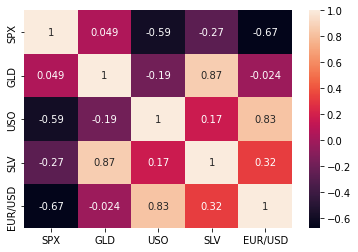

In [8]:
sns.heatmap(corr,annot=True)

In [9]:
 print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


There is only slv column is good correlation with gld.

# sns.distplot(df['GLD'],color='green')

There is distplot for gld price probability density function it shows normally distributed curve.

In [11]:
x=df.drop(['Date' , 'GLD'] , axis=1)
y=df['GLD']

->we need to drop the date column because the date column not having good correlation with gld column.
-> Here i segregate the data into x and y variable because we need to predict gld column using all columns.

In [12]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [13]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest ,ytrain ,ytest =train_test_split(x,y, test_size=0.2, random_state=2)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

Here we use standardscaler for normalization because in gld price probability density function it was not properly normally distributed.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [16]:
def mymodel(model):
 model.fit(xtrain, ytrain)
 ypred= model.predict(xtest)
 train = model.score(xtrain, ytrain)
 test = model.score(xtest, ytest)
 print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
 r2 = r2_score(ytest, ypred)
 mae = mean_absolute_error(ytest,ypred)
 mse = mean_squared_error(ytest,ypred)
 rmse = np.sqrt(mse)
 print(f'r2 score: {r2}, mae: {mae}, rmse: {rmse}')
 
 return model

In [17]:
linreg = mymodel(LinearRegression())

Training Accuracy : 0.8850695972446934
Testing Accuracy : 0.8657886565869237


r2 score: 0.8657886565869237, mae: 5.911486735777763, rmse: 8.41361401522647


In [18]:
knn = mymodel(KNeighborsRegressor(n_neighbors=3))

Training Accuracy : 0.996876582780603
Testing Accuracy : 0.9893486044527416


r2 score: 0.9893486044527416, mae: 1.3311635291120814, rmse: 2.3702340294350925


In [19]:
rf = mymodel(RandomForestRegressor(n_estimators=100))

Training Accuracy : 0.9984443902481475
Testing Accuracy : 0.988445464603418


r2 score: 0.988445464603418, mae: 1.3569856089737977, rmse: 2.468676689645516


Conclusion-: Random forest and knn is giving the good accuracy than lenier regression so we use both random forest regressor and knn.